# Librairies

In [ ]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [ ]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

In [ ]:
data_path = "../data/txt/"

# Choix de la décennie 

In [ ]:
DECADE = '1940'

In [ ]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [ ]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

Pour la vectorisation des documents avec TF-IDF, voir S2_clustering.

# Clusters

### Définir un nombre de clusters

In [ ]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [ ]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [ ]:
clusters = km_model.fit_predict(tfidf_vectors)

In [ ]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [ ]:
i = 0

In [ ]:
clu0_path = f'../data/clu{i}'

In [ ]:
os.makedirs(clu0_path,exist_ok=True)

In [ ]:
l = clustering[i]
l[0]

'KB_JB838_1940-01-04_01-00001.txt'

In [ ]:
files_clu0 = [f for f in sorted(os.listdir(data_path)) if f in l]

In [ ]:
content_list = []
for f in files_clu0:
    with open(os.path.join(data_path, f), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [ ]:
with open(os.path.join(clu0_path, f'clu{i}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [ ]:
pprint(dict(clustering))

{0: ['KB_JB838_1940-01-04_01-00001.txt',
     'KB_JB838_1940-01-10_01-00003.txt',
     'KB_JB838_1940-01-11_01-00004.txt',
     'KB_JB838_1940-01-27_01-00004.txt',
     'KB_JB838_1940-01-31_01-00002.txt',
     'KB_JB838_1940-02-07_01-00004.txt',
     'KB_JB838_1940-02-25_01-00006.txt',
     'KB_JB838_1940-02-29_01-00005.txt',
     'KB_JB838_1940-03-01_01-00003.txt',
     'KB_JB838_1940-03-03_01-00004.txt',
     'KB_JB838_1940-03-10_01-00003.txt',
     'KB_JB838_1940-03-31_01-00002.txt',
     'KB_JB838_1940-04-16_01-00003.txt',
     'KB_JB838_1940-04-19_01-00004.txt',
     'KB_JB838_1940-04-29_01-00001.txt',
     'KB_JB838_1940-05-02_01-00002.txt',
     'KB_JB838_1940-05-02_01-00004.txt',
     'KB_JB838_1940-06-19_01-00002.txt',
     'KB_JB838_1940-06-21_01-00003.txt',
     'KB_JB838_1940-07-11_01-00001.txt',
     'KB_JB838_1940-07-16_01-00001.txt',
     'KB_JB838_1940-07-24_01-00001.txt',
     'KB_JB838_1940-08-03_01-00001.txt',
     'KB_JB838_1940-08-11_01-00002.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [ ]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [ ]:
reduced_vectors[:10]

array([[-0.26190105,  0.17151782],
       [ 0.61374839,  0.18336638],
       [ 0.12160863, -0.07555842],
       [-0.29838524,  0.2816114 ],
       [-0.26392005,  0.1325398 ],
       [-0.19549471, -0.15440958],
       [-0.28401744,  0.19462457],
       [-0.2508514 ,  0.14196105],
       [-0.11618199, -0.14690385],
       [ 0.45518693,  0.04279944]])

### Générer le plot

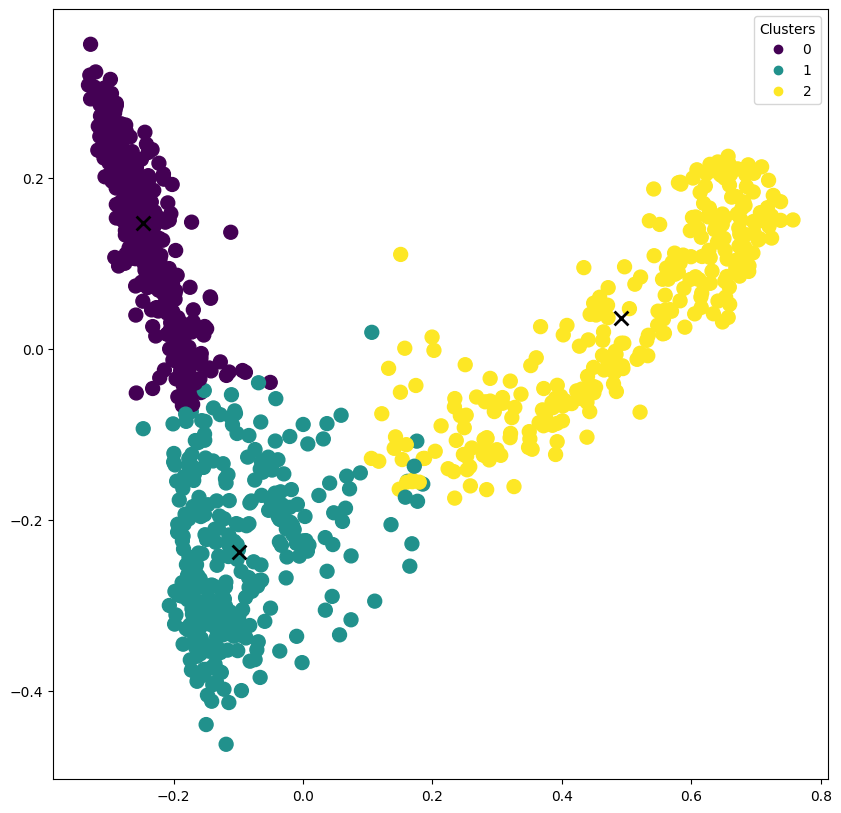

In [ ]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

# Visualisation des clusters avec TP2

In [ ]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f"_{DECADE[:-1]}.txt"), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [ ]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f"_{DECADE[:-1]}.txt"), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"54 e ANNEE. — N° 4. Pages - 40 C 1 *® 8 Grand-Duché : 45 centimes. - France : 75 centime». ABONNEMENTS pour la province on Province } s'abonne à là Poste CH' Vüle au $ pour | T , oi , ŒOl# 28>50 BUREAUX ET FILS SPÉCIAUX: — — ■ ; S Un an 170.00 Congo • j Six mol , 85X0 Etranger : Prix euivant conventions VENTE ET ABONNEM. : PLACE DE LOUVAIN. 23 □ SALLE DE DÉPÊCHES : 124. RUE ROYALE BRUXELLES G “ ■“ 10 ANNONCES : AGENCE ROS8EL, R. ROYALE. 122 . • ' -), . . JEUDI 4 JANVIER 1940. Ed». à 14. h. 00 5 "

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage 

In [ ]:
def clean_text(DECADE, folder=None):
    if folder is None:
        input_path = f"_{DECADE[:-1]}.txt"
        output_path = f"_{DECADE}_clean.txt"
    else:
        input_path = f"{folder}/_{DECADE[:-1]}.txt"
        output_path = f"{folder}/_{DECADE}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [ ]:
clean_text(DECADE, folder=temp_path)

'Output has been written in ../data/tmp/_1940_clean.txt!'

In [ ]:
# Vérifier le résultat
with open(os.path.join(temp_path, f"_{DECADE}_clean.txt"), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'ANNEE PAGES GRAND DUCHÉ CENTIMES FRANCE CENTIME ABONNEMENTS PROVINCE PROVINCE ABONNE POSTE VÜLE ŒOL BUREAUX FILS SPÉCIAUX CONGO SIX MOL ETRANGER PRIX EUIVANT CONVENTIONS VENTE ABONNEM PLACE LOUVAIN SALLE DÉPÊCHES RUE ROYALE BRUXELLES ANNONCES AGENCE ROYALE JEUDI JANVIER ÉDITIONS EDIT NUIT DERNIÈRE EDIT NUIT QUELLE HEURE LAQUELLE ACHETIEZ SOIR DEMANDEZ VENDEUR DERNIÈRE ÉDITION PARUE LONDRES FLEET STREET AGGLOMÉRATION BRUXELLOISE ABONNER MOIS FILS SPECIALFX PARIS LONBRES TELEPHONE BERLIN GENEVE BU'

### Afficher les termes les plus fréquents


In [ ]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 25081), ('BRUXELLES', 15230), ('TÉL', 13328), ('PRIX', 9832), ('ECR', 8550), ('ECRIRE', 8129), ('BON', 7785), ('MAISON', 7542), ('ANS', 7127), ('TRÈS', 6662)]


# Modèle Word2Vec

# Librairies 

In [ ]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

# Entrainement du Modèle 

Code de base, screenshots des résultats présents dans le rapport.

(Chargement des phrases en bigrams, trigrams, unigrams, voir S3_word_embeddings)

## Entrainement d'un modèle Word2Vec sur ce corpus

In [ ]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 2min 16s
Wall time: 55.1 s


### Sauver le modèle dans un fichier

In [ ]:
outfile = f"../data/newspapers.model"
model.save(outfile)

## Explorer le modèle

### Charger le modèle en mémoire

In [ ]:
model = Word2Vec.load("../data/newspapers.model")

### Imprimer le vecteur d'un terme

In [ ]:
model.wv["gouvernement"]

array([-1.0559083e+00,  4.0594909e-01, -2.4725188e-01,  3.3276030e-01,
        1.6695373e+00,  6.3570535e-01, -1.5659896e-03, -8.6556160e-01,
       -2.6623058e+00,  9.1627455e-01,  1.8114084e+00, -5.4319274e-01,
       -2.4795246e-01, -1.4085151e-02, -4.6563822e-01,  5.1304245e-01,
       -8.4522337e-01,  5.4517084e-01, -9.5407647e-01,  6.3937807e-01,
        9.5949548e-01,  7.8659253e-03,  9.1233456e-01, -4.3783629e-01,
        8.2764633e-02,  1.7066017e+00,  2.0282335e+00, -1.6546650e-01,
       -4.5286059e-01,  9.3573713e-01,  5.8618581e-01,  3.1768303e+00],
      dtype=float32)

### Calculer la similarité entre deux termes

In [ ]:
model.wv.similarity("docteur", "professeur")

0.70802367

### Chercher les mots les plus proches d'un terme donné

In [ ]:
model.wv.most_similar("femmes", topn=10)

[('jeunes', 0.9493998885154724),
 ('veritables', 0.9019907116889954),
 ('simples', 0.8900849223136902),
 ('seules', 0.8715073466300964),
 ('rares', 0.8686420321464539),
 ('formes', 0.8663257956504822),
 ('vieilles', 0.8647673726081848),
 ('pauvres', 0.8645374774932861),
 ('petits', 0.8640890121459961),
 ('grosses', 0.8618330955505371)]